In [ ]:
from ovarian_can.infrastructure.path_facade.preprocess_path_resolver import PreprocessPathResolver
from ovarian_can.preprocess.abstract_path_resolver import AbstractPreprocessPathResolver
import joblib
# DI: 抽象インターフェースを経由してパス取得
resolver: AbstractPreprocessPathResolver = PreprocessPathResolver()
# input/outputパス取得
#interm_after_NN_path = resolver.get_intermediate_after_NN_path()
interm_after_Clusetring_path = resolver.get_interm_after_Clusetring_path()


In [ ]:
# 前処理前のデータを読み込み
adata = joblib.load(interm_after_Clusetring_path)
adata

AnnData object with n_obs × n_vars = 228641 × 480
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'pca', 'neighbors', 'leiden', 'leiden_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

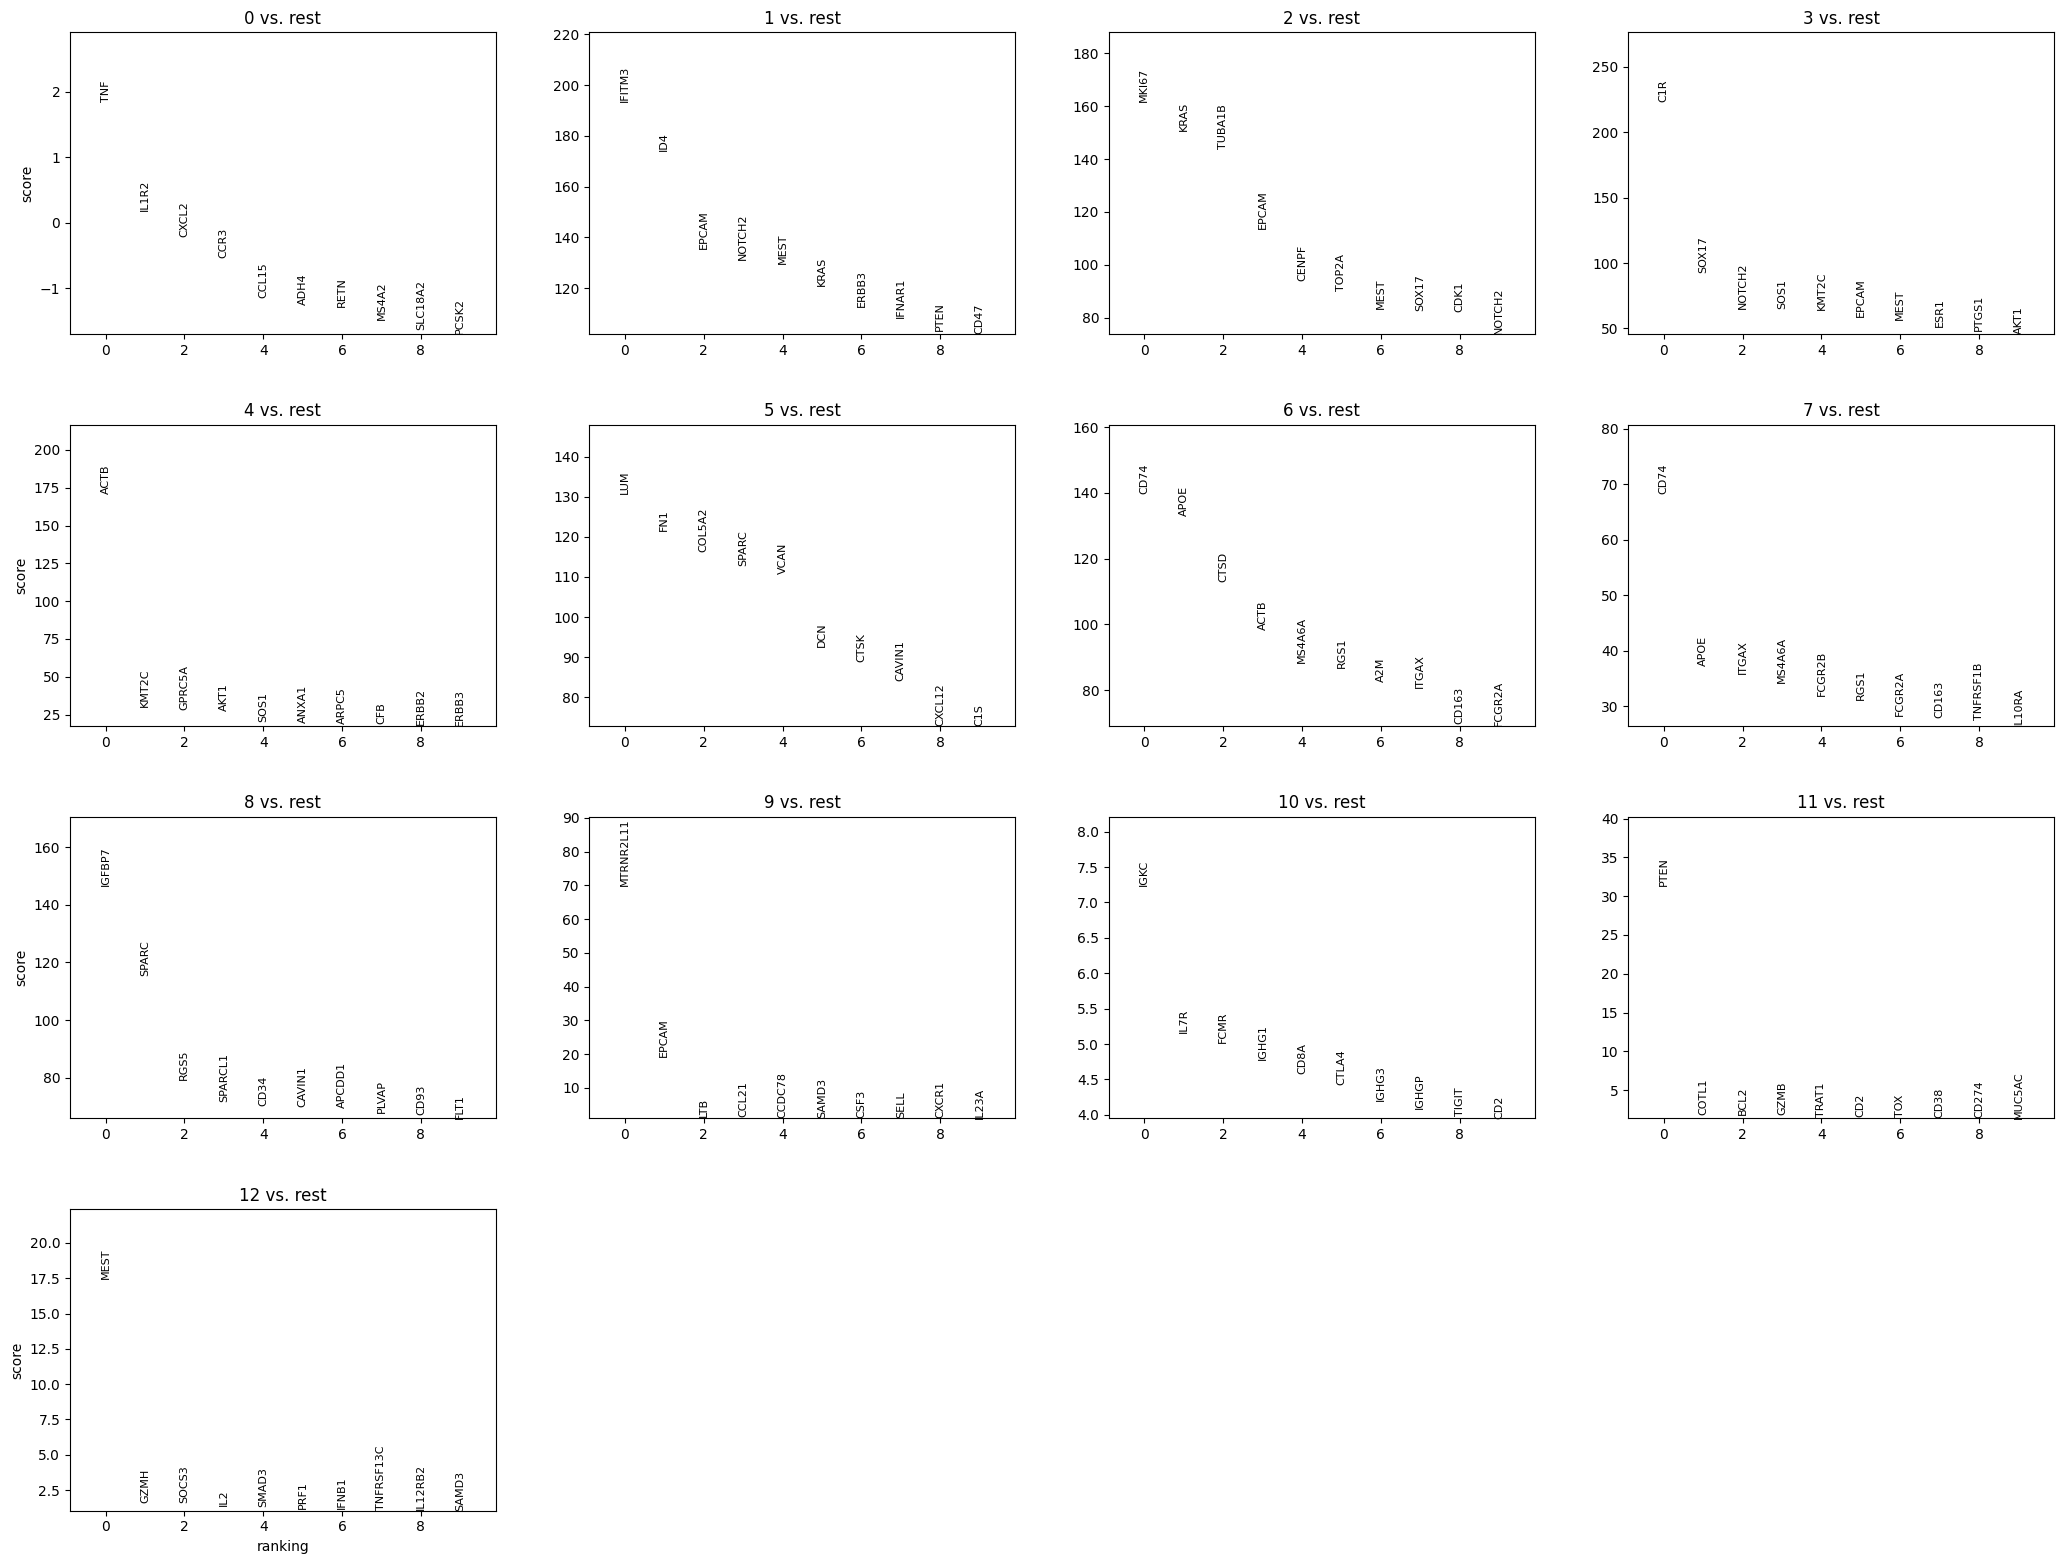

In [4]:
import scanpy as sc
# クラスター間の差次的発現遺伝子解析
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')

# DEG結果を可視化（ヒートマップ）
#sc.pl.rank_genes_groups_heatmap(adata, n_genes=20, groupby='leiden', cmap='viridis', show_gene_labels=True)

# DEG結果を確認（クラスターごとに上位10遺伝子を表示）
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)